In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

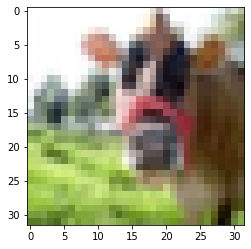

In [77]:
plt.imshow(x_train[0])


In [78]:
y_train.reshape(-1,)

array([19, 29,  0, ...,  3,  7, 73])

In [79]:
x_train.shape

(50000, 32, 32, 3)

In [80]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

In [81]:
x_train=x_train/255
x_test=x_test/255

In [82]:
x_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.76470588, 0.80392157, 0.75686275],
         [0.83137255, 0.87843137, 0.8       ],
         [0.71372549, 0.76078431, 0.65490196]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.66666667, 0.69019608, 0.58823529],
         [0.63137255, 0.65882353, 0.50980392],
         [0.57254902, 0.60392157, 0.44313725]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74117647, 0.78039216, 0.6627451 ],
         [0.65098039, 0.69803922, 0.50980392],
         [0.4745098 , 0.52156863, 0.34117647]],

        ...,

        [[0.58039216, 0.7254902 , 0.30980392],
         [0.55686275, 0.71372549, 0.22352941]

In [83]:
x_test

array([[[[0.78039216, 0.84313725, 0.97647059],
         [0.76862745, 0.82745098, 0.95686275],
         [0.76470588, 0.82352941, 0.95294118],
         ...,
         [0.84705882, 0.90588235, 0.98039216],
         [0.85098039, 0.90588235, 0.98039216],
         [0.87843137, 0.91764706, 0.98823529]],

        [[0.77254902, 0.82352941, 0.9372549 ],
         [0.76470588, 0.81568627, 0.93333333],
         [0.76470588, 0.82352941, 0.94117647],
         ...,
         [0.90588235, 0.95294118, 0.98039216],
         [0.91372549, 0.95294118, 0.98039216],
         [0.94509804, 0.96078431, 0.99215686]],

        [[0.87058824, 0.88627451, 0.96470588],
         [0.83529412, 0.8627451 , 0.94901961],
         [0.81960784, 0.85882353, 0.95294118],
         ...,
         [0.95294118, 0.98039216, 0.98431373],
         [0.95686275, 0.97647059, 0.98431373],
         [0.98039216, 0.98039216, 0.99215686]],

        ...,

        [[0.28235294, 0.28627451, 0.38823529],
         [0.27843137, 0.29019608, 0.4       ]

In [84]:
_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(100, activation='softmax')
])

In [85]:

model.compile(optimizer='Adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dense_13 (Dense)             (None, 100)              

In [98]:
history=model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0141 - accuracy: 0.9967
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0066 - accuracy: 0.9991
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9990
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0080 - accuracy: 0.9989
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0072 - accuracy: 0.9989
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0074 - accuracy: 0.9990
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9991
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0071 - accuracy: 0.9991
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0063 - accuracy: 0.9993
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.006